In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qlearning import QLearning
from tqdm import tqdm
import gymnasium as gym
from wrappers import TltlWrapper, PredicateEvaluationResult, PositionPredicate, PositionWrapper, MoveActionWrapper
from gymnasium.spaces.utils import flatten_space, flatten
from gymnasium.spaces import Dict, Discrete
from minigrid.wrappers import DictObservationSpaceWrapper, FullyObsWrapper
from stable_baselines3.common.logger import configure
import numpy as np
import random
from tools import save_frames_as_gif
from qlearning import greedy_policy, transform_to_tuple
from minigrid.core.world_object import Goal

import matplotlib.pyplot as plt

pygame 2.5.1 (SDL 2.28.2, Python 3.9.17)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [0]:
"""
Test for the TLTL of: F p1 & F p2 & (! p1 U p2)
"""
# env = gym.make("MiniGrid-Empty-8x8-v0", render_mode="rgb_array", max_episode_steps=50)
# goal1 = Goal()
# goal1.color = 'red'
# env.put_obj(goal1, 5,5)
# goal2 = Goal()
# goal2.color = 'blue'
# env.put_obj(goal2, 3,3)
# env = TltlWrapper(env, tltl="F p1 & F p2 & (! p1 U p2)",
#                   predicates={'p1': PositionPredicate(True, [3, 3]), 'p2': PositionPredicate(True, [5, 5])})
# env = PositionWrapper(env)
# env = MoveActionWrapper(env)
# env = gym.wrappers.FilterObservation(env, ["pos", "fspa", "direction"])

In [6]:
q_table = np.load('q_table_random_5-2-3_X_snytex.npy')

env = gym.make("MiniGrid-Empty-8x8-v0", render_mode="rgb_array", max_episode_steps=50)
env = TltlWrapper(env, tltl="F p1 & F p2 & F p3 & (! p1 U p2) & (! p2 U p3)",
                  predicates={'p1': PositionPredicate(True, [3, 3]), 'p2': PositionPredicate(True, [5, 5]),
                              'p3': PositionPredicate(True, [2, 2])})
env = PositionWrapper(env)
env = MoveActionWrapper(env)
env = gym.wrappers.FilterObservation(env, ["pos", "fspa", "direction"])

MovieWriter imagemagick unavailable; using Pillow instead.


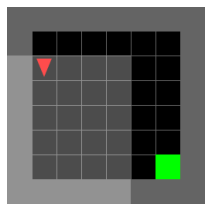

In [8]:
state, info = env.reset()
frames = []
frames.append(env.render())
for step in range(0, 50):
    state = transform_to_tuple(state)
    action = greedy_policy(q_table, state)
    new_state, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    if terminated or truncated:
        new_state, info = env.reset()
    state = new_state
env.close()
save_frames_as_gif(frames,'./', '5-2-3-random.gif')

In [4]:
rewards = np.load("all_rewards_q_table_random_2-5-3_150000.npy")

In [15]:
running_average = []
window = 50
for ind in range(len(rewards) - window + 1):
    running_average.append(np.mean(rewards[ind:ind+window]))

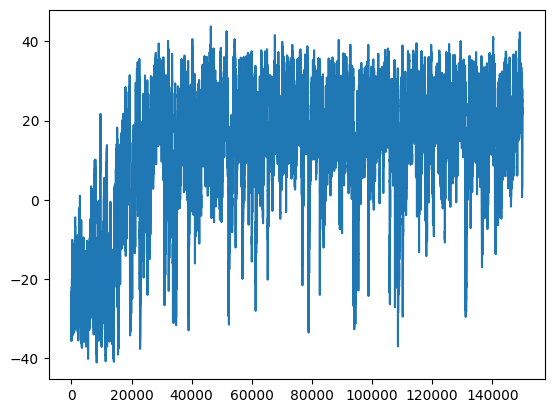

In [16]:
plt.plot(running_average)

In [8]:
re.shape

(200,)

In [9]:
re

array([-50.0390625, -50.0390625, -42.8515625, -47.8515625,  49.9609375,
       -50.0390625, -50.0390625, -47.8515625, -47.8515625, -47.8515625,
        49.9609375, -47.8515625, -50.0390625, -47.8515625, -50.0390625,
        49.9609375, -57.421875 , -47.8515625,  44.0234375, -47.8515625,
        46.4453125, -42.8515625, -50.0390625,  49.9609375,  49.9609375,
        49.1796875, -47.8515625, -47.8515625, -47.8515625,  49.9609375,
       -50.3125   ,  48.59375  , -42.8515625, -50.0390625, -42.8515625,
       -47.8515625, -50.0390625, -47.8515625, -42.8515625,  49.9609375,
        49.9609375,  34.140625 , -42.8515625, -50.0390625, -50.5859375,
       -50.0390625, -42.8515625, -47.8515625, -42.8515625, -50.234375 ,
       -68.2421875,  49.9609375, -42.8515625, -42.8515625,  49.9609375,
       -42.8515625, -42.8515625,  49.9609375,  46.4453125, -47.8515625,
       -47.8515625,  49.9609375,  46.4453125, -47.8515625, -50.0390625,
        45.8984375,  49.9609375,  49.9609375, -47.8515625, -42.8

In [10]:
rewards

array([-50.0390625,  49.9609375,  49.9609375, ..., -50.0390625,
        49.21875  ,  48.28125  ])